# Whether Prediction with CNN

we'll build a CNN using Keras to use it classifying pictures in five different categories

categories : dew, fog, lightning, rain, sandstorm.

Dataset link : https://www.kaggle.com/datasets/jehanbhathena/weather-dataset

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow as tf

## Categories 

In [2]:
code = {'dew':0,'fogsmog':1,'lightning':2,'rain':3,'sandstorm':4}

## Helper Functions

In [3]:
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x  

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

## Dataset Pathes 

In [5]:
train_dew = r"""C:\Users\hp\dataset\dew"""
train_fog = r"""C:\Users\hp\dataset\fogsmog"""
train_light = r"""C:\Users\hp\dataset\lightning"""
train_rain = r"""C:\Users\hp\dataset\rain"""
train_sand = r"""C:\Users\hp\dataset\sandstorm"""

## Loading & Split Dataset

In [7]:
dew_images = load_images_from_folder(train_dew)
dew_train = dew_images[:250]
dew_test = dew_images[250:300]

fog_images = load_images_from_folder(train_fog)
fog_train = fog_images[:250]
fog_test = fog_images[250:300]

light_images = load_images_from_folder(train_light)
light_train = light_images[:250]
light_test = light_images[250:300]

rain_images = load_images_from_folder(train_rain)
rain_train = rain_images[:250]
rain_test = rain_images[250:300]

sand_images = load_images_from_folder(train_sand)
sand_train = sand_images[:250]
sand_test = sand_images[250:300]

## Train Data in one List
## Output of Train Data in one List (Encoded Classes)

In [8]:
all_images = list()#train 

In [9]:
all_images.clear()

In [10]:
y_images = list()#output

In [11]:
for i in range(250):
    all_images.append(dew_train[i])
    y_images.append(0)

In [12]:
for i in range(250):
    all_images.append(fog_train[i])
    y_images.append(1)

In [13]:
for i in range(250):
    all_images.append(light_train[i])
    y_images.append(2)

In [14]:
for i in range(250):
    all_images.append(rain_train[i])
    y_images.append(3)

In [15]:
for i in range(250):
    all_images.append(sand_train[i])
    y_images.append(4)

In [16]:
print(len(all_images))

1250


In [17]:
print(len(y_images))

1250


## Load x_test , y_test(encoded)

In [18]:
x_test = list()
y_test = list()

for i in range(50):
    x_test.append(dew_test[i])
    y_test.append(0)

for i in range(50):
    x_test.append(fog_test[i])
    y_test.append(1)
    
for i in range(50):
    x_test.append(light_test[i])
    y_test.append(2)
    
for i in range(50):
    x_test.append(rain_test[i])
    y_test.append(3)
for i in range(50):
    x_test.append(sand_test[i])
    y_test.append(4)

In [19]:
len(all_images)

1250

In [20]:
len(y_images)

1250

In [21]:
len(x_test)

250

In [22]:
len(y_test)

250

## Showing Images of Dataset

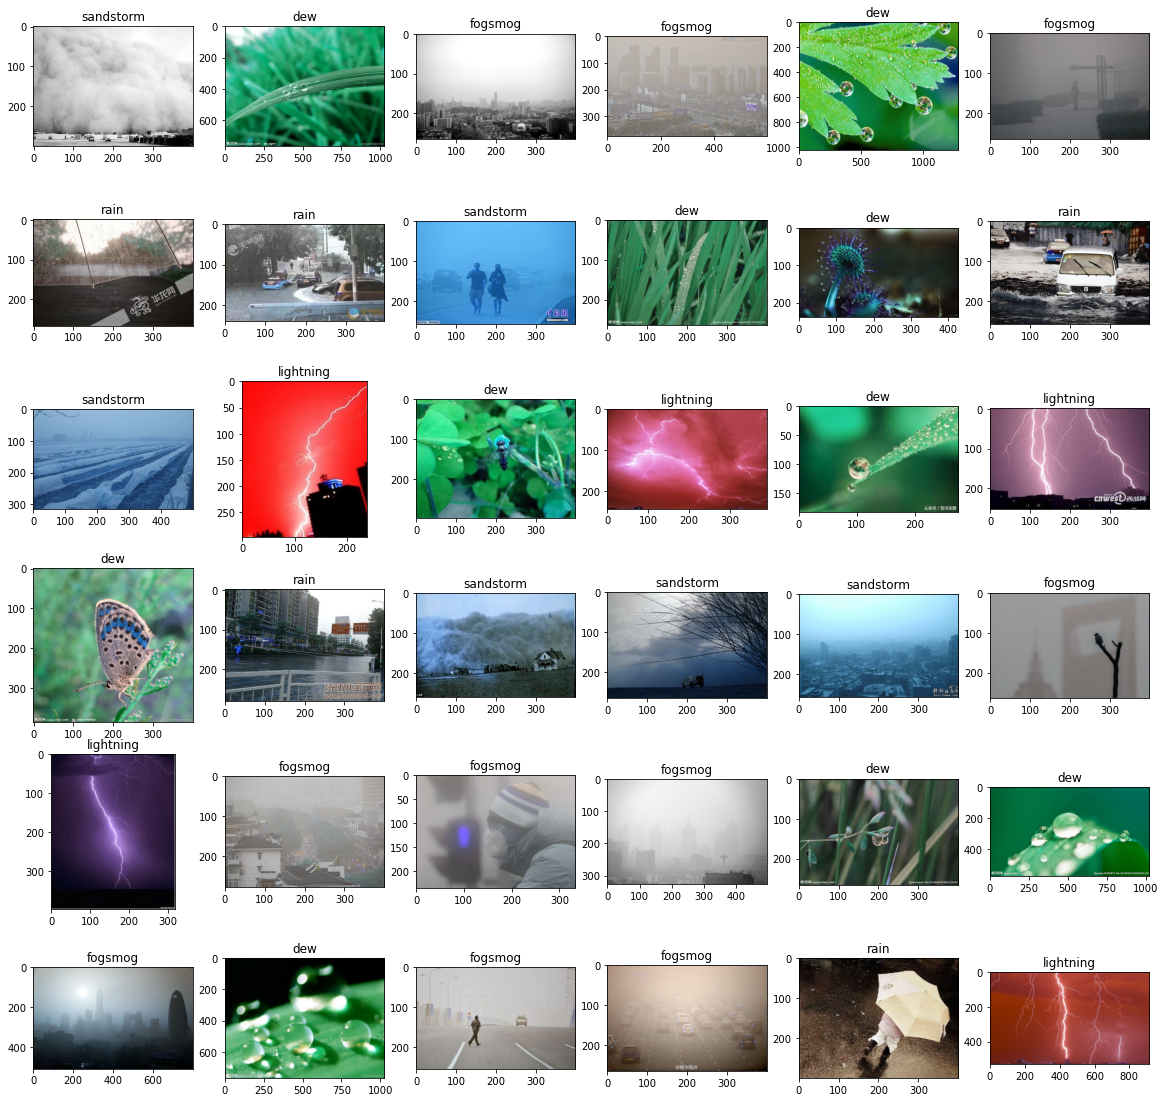

In [23]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(all_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(all_images[i])   
    plt.axis('on')
    plt.title(getcode(y_images[i]))

## Resize Train Images

In [24]:
s = 128

In [25]:
x_train = []
for i in range(1250):
    image_array = cv2.resize(all_images[i] , (s,s))
    x_train.append(list(image_array))

In [26]:
#for training >>> x_train , y_images

In [27]:
# for testing >>> x_test , y_test

## Showing Train Data After Resize

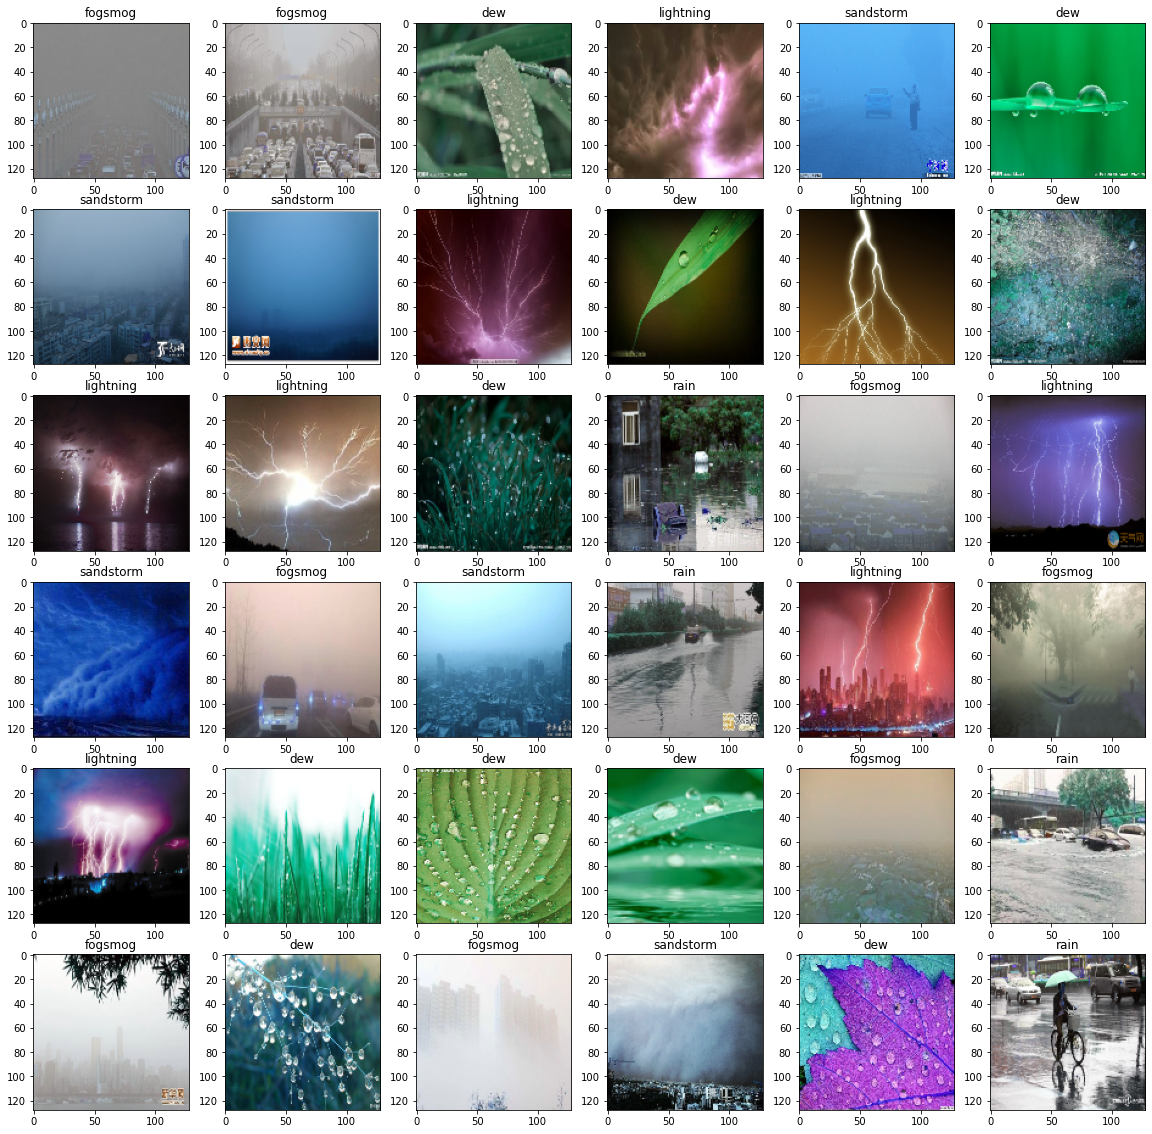

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('on')
    plt.title(getcode(y_images[i]))

## Resize Test Images

In [29]:
n_x_test = []
for i in range(250):
    image_array = cv2.resize(x_test[i] , (s,s))
    n_x_test.append(list(image_array))

## Showing Test Data After Resize

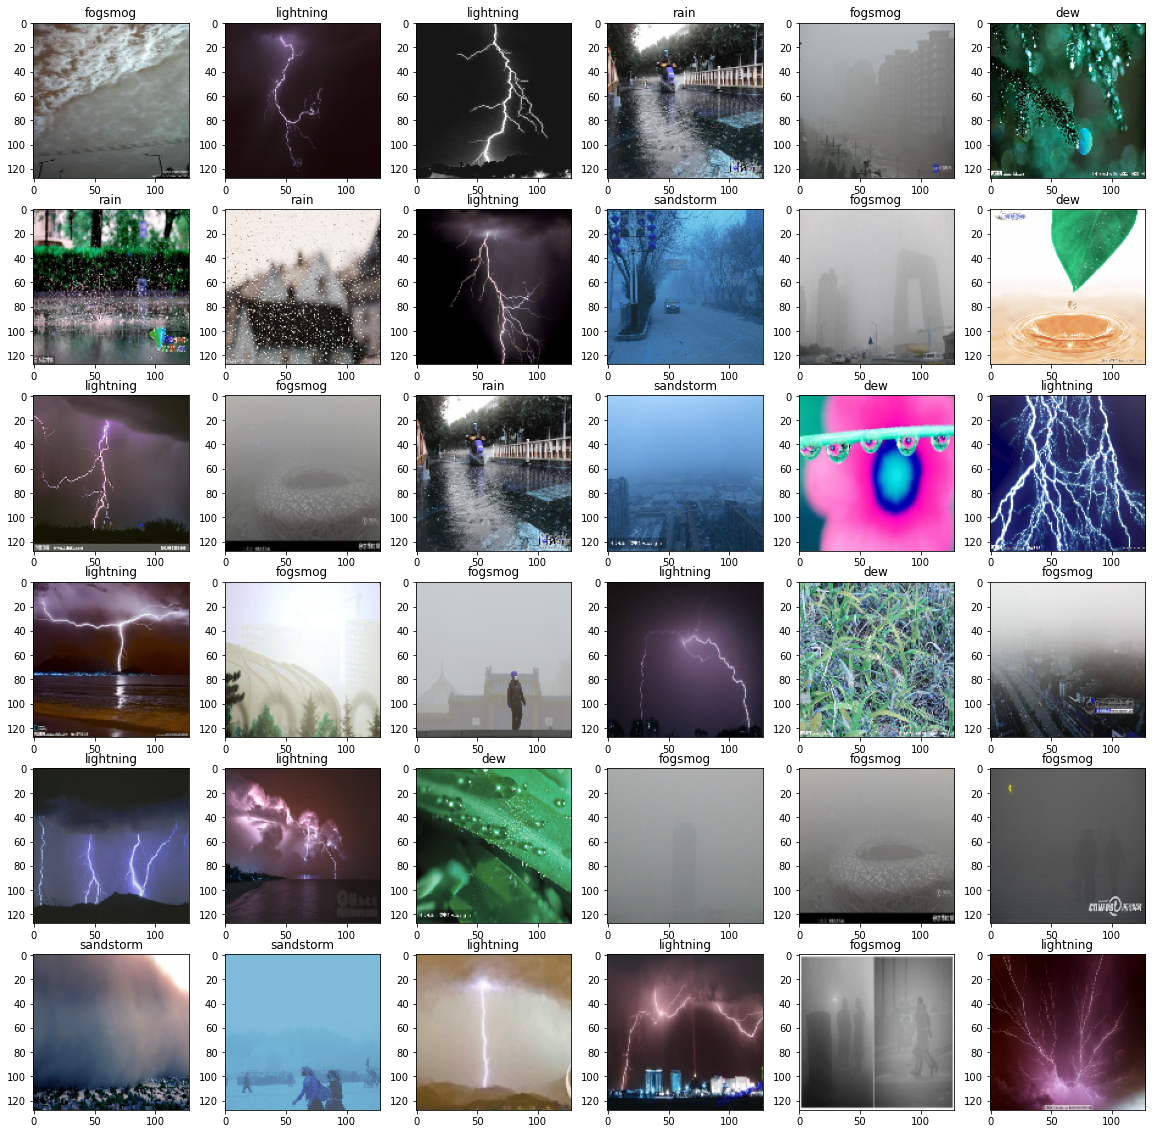

In [30]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(n_x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(n_x_test[i])   
    plt.axis('on')
    plt.title(getcode(y_test[i]))

## Shuffle Data

In [31]:
import random
 
# initializing lists
test_list1 = x_train
test_list2 = y_images
 
# Shuffle two lists with same order
# Using zip() + * operator + shuffle()
temp = list(zip(test_list1, test_list2))
random.shuffle(temp)


res1, res2 = zip(*temp)

# res1 and res2 come out as tuples, and so must be converted to lists.
res1, res2 = list(res1), list(res2)

## Showing Data After Shuffle

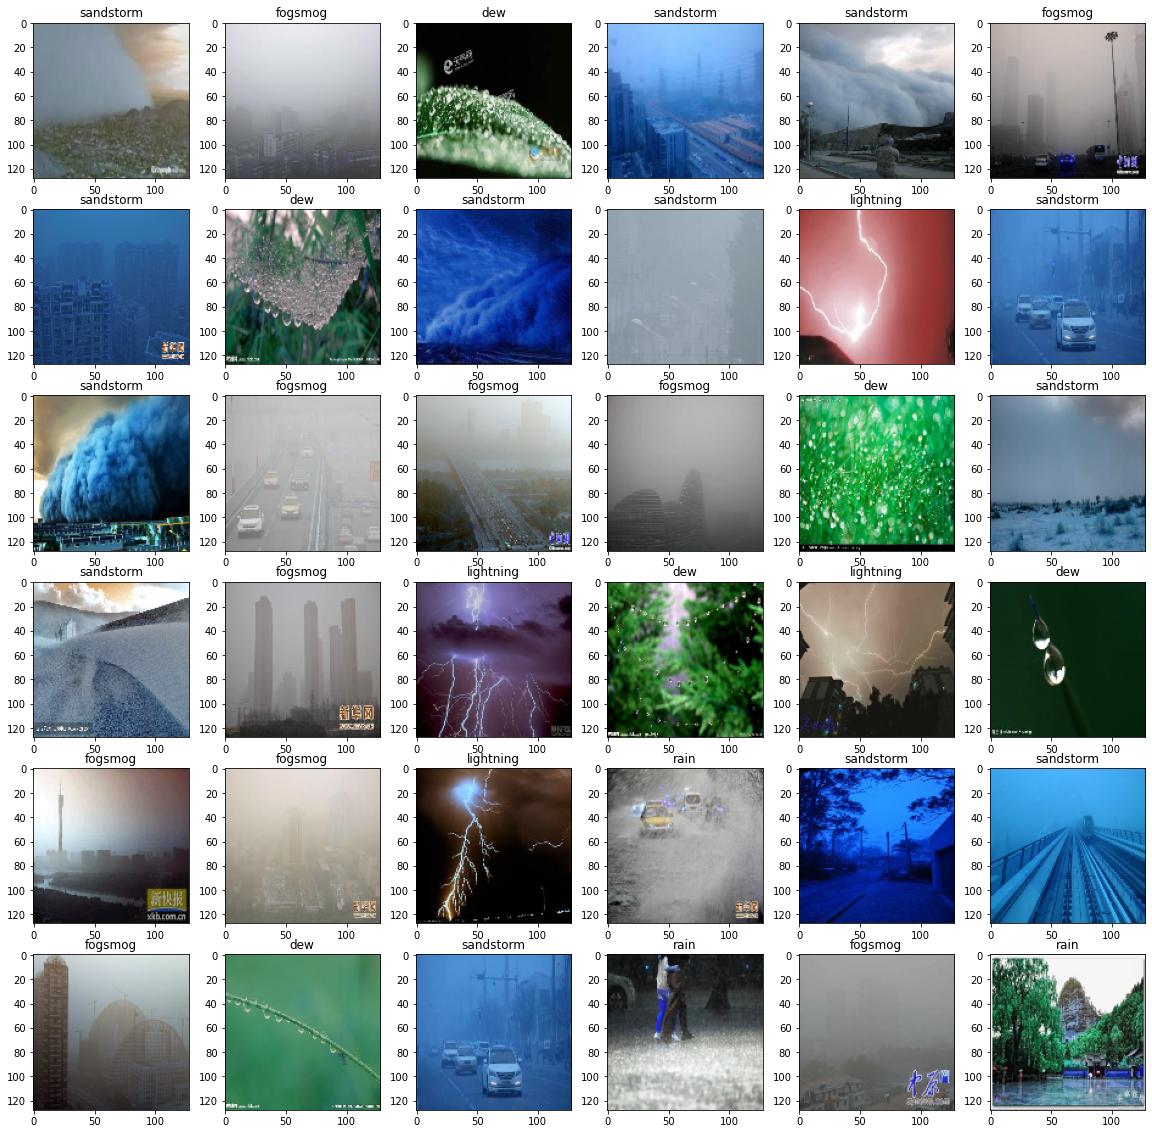

In [32]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(res1),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(res1[i])   
    plt.axis('on')
    plt.title(getcode(res2[i]))

## Training Model 

In [38]:
res1 = np.array(res1)
res2 = np.array(res2)

In [39]:
# KerasModel = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
#         #tf.keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
#         tf.keras.layers.MaxPool2D(4,4),
#         tf.keras.layers.Conv2D(100,kernel_size=(3,3),activation='relu'),    
#         tf.keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
#         tf.keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
#         tf.keras.layers.MaxPool2D(4,4),
#         tf.keras.layers.Flatten() ,   
#         #tf.keras.layers.Dropout(rate=0.3),
#         tf.keras.layers.Dense(128,activation='relu') ,  
#         #tf.keras.layers.Dropout(rate=0.25) ,
#         tf.keras.layers.Dense(64,activation='relu') ,    
#         #tf.keras.layers.Dense(50,activation='relu') ,     #hidden   
#         tf.keras.layers.Dropout(rate=0.25) ,            
#         tf.keras.layers.Dense(5,activation='softmax') ,  #output layer  
#         ])

In [40]:
KerasModel = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        tf.keras.layers.MaxPool2D(4,4),    
        tf.keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(4,4),
        tf.keras.layers.Flatten() ,   
        tf.keras.layers.Dense(128,activation='relu') ,  
        tf.keras.layers.Dense(64,activation='relu') ,    
        tf.keras.layers.Dense(32,activation='relu') ,  
        tf.keras.layers.Dropout(rate=0.25) , 
        tf.keras.layers.Dense(5,activation='softmax') ,  
        ])

In [41]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
ThisModel = KerasModel.fit(res1, res2, epochs=10,verbose=1)

Epoch 1/10
40/40 [==============================] - 11s 263ms/step - loss: 6.2598 - accuracy: 0.4888
Epoch 2/10
40/40 [==============================] - 12s 288ms/step - loss: 0.8816 - accuracy: 0.6616
Epoch 3/10
40/40 [==============================] - 12s 295ms/step - loss: 0.7136 - accuracy: 0.7552
Epoch 4/10
40/40 [==============================] - 12s 294ms/step - loss: 0.5972 - accuracy: 0.7912
Epoch 5/10
40/40 [==============================] - 11s 280ms/step - loss: 0.6385 - accuracy: 0.7888
Epoch 6/10
40/40 [==============================] - 11s 285ms/step - loss: 0.5913 - accuracy: 0.8032
Epoch 7/10
40/40 [==============================] - 12s 302ms/step - loss: 0.4681 - accuracy: 0.8528
Epoch 8/10
40/40 [==============================] - 11s 285ms/step - loss: 0.4745 - accuracy: 0.8328
Epoch 9/10
40/40 [==============================] - 12s 293ms/step - loss: 0.4060 - accuracy: 0.8584
Epoch 10/10
40/40 [==============================] - 12s 303ms/step - loss: 0.3305 - accura

In [43]:
# ThisModel.history['loss']

In [44]:
#ThisModel.history['accuracy']

# Final Lose & Accuracy

In [45]:
n_x_test = np.array(n_x_test)
y_test = np.array(y_test)

ModelLoss, ModelAccuracy = KerasModel.evaluate(n_x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

8/8 [==============================] - 1s 80ms/step - loss: 0.5096 - accuracy: 0.8720
Test Loss is 0.509562075138092
Test Accuracy is 0.871999979019165


# Evaluate yrain data 

In [65]:
KerasModel.evaluate(res1,res2)

40/40 [==============================] - 3s 81ms/step - loss: 0.2557 - accuracy: 0.9200


[0.2556590139865875, 0.9200000166893005]

## Saving The Model

In [64]:
KerasModel.save('hp')
my_model.load_weights('my_model_weights.h5')

INFO:tensorflow:Assets written to: hp\assets


## Summary

In [48]:
#model architecture
KerasModel.summary()

# ***The End***